# Hotel Booking Cancellation Prediction

## Data Cleaning and Exploratory Data Analysis (EDA)

In [1]:
#importing the required libraries 
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from datetime import datetime

In [2]:
#reading and converting csv data in to data frame
dataframe=pd.read_csv('hotel_bookings.csv',sep=',')

In [3]:
#getting the column names
dataframe.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [4]:
#checking the first 5 rows of the dataframe
dataframe.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
#checking the number of rows and columns of the dataframe
dataframe.shape

(119390, 32)

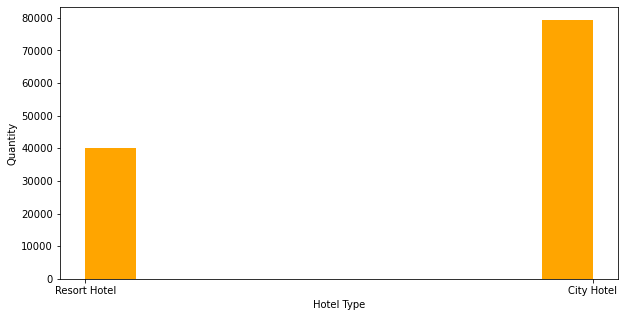

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [6]:
#checking the initial distribution of bookings for each hotel in the dataset
fig,ax=plt.subplots(figsize=(10,5))
ax.hist(dataframe['hotel'],color='orange')
ax.set_xlabel('Hotel Type')
ax.set_ylabel('Quantity')
plt.show()

dataframe['hotel'].value_counts()

In [7]:
#keeping a copy of the original dataset in case it is needed
df=dataframe.copy() 

In [8]:
#checking the data types of all columns 
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [9]:
#getting the unique values for each column 
for col in df.columns:
    print(f"{col}: \n{dataframe[col].unique()}\n")

hotel: 
['Resort Hotel' 'City Hotel']

is_canceled: 
[0 1]

lead_time: 
[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 283 153 197 133 241 193

reservation_status_date: 
['2015-07-01' '2015-07-02' '2015-07-03' '2015-05-06' '2015-04-22'
 '2015-06-23' '2015-07-05' '2015-07-06' '2015-07-07' '2015-07-08'
 '2015-05-11' '2015-07-15' '2015-07-16' '2015-05-29' '2015-05-19'
 '2015-06-19' '2015-05-23' '2015-05-18' '2015-07-09' '2015-06-02'
 '2015-07-13' '2015-07-04' '2015-06-29' '2015-06-16' '2015-06-18'
 '2015-06-12' '2015-06-09' '2015-05-26' '2015-07-11' '2015-07-12'
 '2015-07-17' '2015-04-15' '2015-05-13' '2015-07-10' '2015-05-20'
 '2015-05-12' '2015-07-14' '2015-06-17' '2015-05-01' '2015-03-30'
 '2015-07-19' '2015-06-03' '2015-06-26' '2015-05-14' '2015-07-20'
 '2015-05-07' '2015-05-28' '2015-04-13' '2015-03-25' '2015-07-21'
 '2015-06-27' '2015-07-18' '2015-07-23' '2015-06-08' '2015-06-22'
 '2015-06-24' '2015-03-05' '2015-06-01' '2015-04-24' '2015-07-22'
 '2015-05-27' '2015-04-06' '2015-04-11' '2015-07-25' '2015-07-28'
 '2015-07-29' '2015-06-25' '2015-07-24' '2015-06-05' '2015-06-30'
 '2015-06-13' '2015-06-11' '2015-07-30' '2015-07-2

In [10]:
#Converting a date column to date time format
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])
print(df.dtypes['reservation_status_date'])

datetime64[ns]


In [11]:
#Creating a dictionary for the arrival months
month_names_dict = {
    'January':1,
    'February':2,
    'March':3,
    'April':4,
    'May':5,
    'June':6,
    'July':7,
    'August':8,
    'September':9,
    'October':10,
    'November':11,
    'December':12
}
month_names=list(month_names_dict.keys())
month_numbers=list(month_names_dict.values())

In [12]:
#replacing month names with month numbers
df['arrival_date_month'] = df['arrival_date_month'].replace(month_names,month_numbers)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,8,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,8,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,8,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,8,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [13]:
#renaming the colummns relating to arrival date
df.rename(columns = {'arrival_date_year':'year', 'arrival_date_month':'month', 'arrival_date_day_of_month':'day'}, inplace = True)

#combining the three columns to make the new column 'arrival date' in date format
df['arrival_date']= df.apply(lambda x:datetime.strptime("{0} {1} {2}".format(x['year'],x['month'], x['day']), "%Y %m %d"),axis=1)

In [14]:
#dropping an unnecessary column
df=df.drop('arrival_date_week_number',axis=1)

In [15]:
#checking the dataframe after the changes
df

,hotel,is_canceled,lead_time,year,month,day,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,2015,7,1,0,0,2,0.0,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,7,1,0,0,2,0.0,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,2015,7,1,0,1,1,0.0,...,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,2015,7,1,0,1,1,0.0,...,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,2015,7,1,0,2,2,0.0,...,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,8,30,2,5,2,0.0,...,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-08-30
119386,City Hotel,0,102,2017,8,31,2,5,3,0.0,...,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-08-31
119387,City Hotel,0,34,2017,8,31,2,5,2,0.0,...,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017-08-31
119388,City Hotel,0,109,2017,8,31,2,5,2,0.0,...,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017-08-31


### Handling missing values

In [16]:
#checking for null values in all columns 
null_values=df.isnull().sum().sort_values(ascending=False)
null_values

company                           112593
agent                              16340
country                              488
children                               4
hotel                                  0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
days_in_waiting_list                   0
previous_bookings_not_canceled         0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
reservation_status_date                0
reserved_room_type                     0
previous_cancellations                 0
is_canceled                            0
is_repeated_guest                      0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults          

In [17]:
#taking the percentage of null values
null_per=null_values[null_values!=0]/df.shape[0]*100
print(round(null_per,3))

company     94.307
agent       13.686
country      0.409
children     0.003
dtype: float64


In [18]:
null_df=pd.DataFrame(null_per,columns=['Null value %'])
null_df

,Null value %
company,94.306893
agent,13.686238
country,0.408744
children,0.003350


In [19]:
#replacing all the missing values with zero and mode in the columns 'children' and 'country' respectively 
df['children']=df['children'].fillna(0)
df['country'].fillna(value = df['country'].mode()[0],inplace=True)

#removing columns that has too many missing values
df_new=df.drop(columns=['company','agent'],axis=1)

#checking the number of rows and columns of the new dataframe
df_new.shape

(119390, 30)

In [20]:
#checking if there are no null values now
null_values=df_new.isnull().sum().sort_values(ascending=False)
null_values

hotel                             0
is_canceled                       0
reservation_status_date           0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
day                               0
month                             0
year                        

In [21]:
#replacing 'Undefined' from the 'meal' column with 'SC'
df_new['meal']=df_new['meal'].str.replace('Undefined','SC')

#rechecking the unique values after replacement
unique_meal = df_new['meal'].unique()
print('Unique values now are:',unique_meal)

Unique values now are: ['BB' 'FB' 'HB' 'SC']


In [22]:
#getting the value count of the 'market_segment' column
df_new['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [23]:
#replacing 'Undefined' from the 'market_segment' column with the mode
print('Mode of the market_segment column is:',df_new['market_segment'].mode())
df_new['market_segment']=df_new['market_segment'].str.replace('Undefined','Online TA')

#rechecking the unique values after replacement
unique_marketseg= df_new['market_segment'].unique()
print('Unique values now are:',unique_marketseg)

Mode of the market_segment column is: 0    Online TA
dtype: object
Unique values now are: ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Aviation']


In [24]:
#getting the value count of the 'distribution_channel' column
df_new['distribution_channel'].value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

In [25]:
#replacing 'Undefined' from the 'distribution_channel' column with the mode
print('Mode of the distribution_channel column is:',df_new['distribution_channel'].mode())
df_new['distribution_channel']=df_new['distribution_channel'].str.replace('Undefined','TA/TO')

#rechecking the unique values after replacement
unique_distri = df_new['distribution_channel'].unique()
print('Unique values now are:',unique_marketseg,unique_distri)

Mode of the distribution_channel column is: 0    TA/TO
dtype: object
Unique values now are: ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Aviation'] ['Direct' 'Corporate' 'TA/TO' 'GDS']


### Handling invalid data

In [26]:
#getting the summary statistics
df_new.describe()

,is_canceled,lead_time,year,month,day,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,6.552483,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,3.090619,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,4.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,7.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,9.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,12.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [27]:
#removing the rows which have zero customers in a booking
zero_cust=df_new[(df_new['adults']==0) & (df_new['children']==0) & (df_new['babies']==0)].index
df_new=df_new.drop(zero_cust)                                

In [28]:
#removing the rows which have zero adults in a booking
zero_adu=df_new[df_new['adults'] == 0].index
df_new=df_new.drop(zero_adu) 

In [29]:
#removing the rows which have negative adr values
neg_adr=df_new[df_new['adr'] <0].index
df_new=df_new.drop(neg_adr) 

In [30]:
#rechecking if zero is removed from the 'adults' column
df_new['adults'].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55, 20,  6,  5, 10], dtype=int64)

### Handling outliers

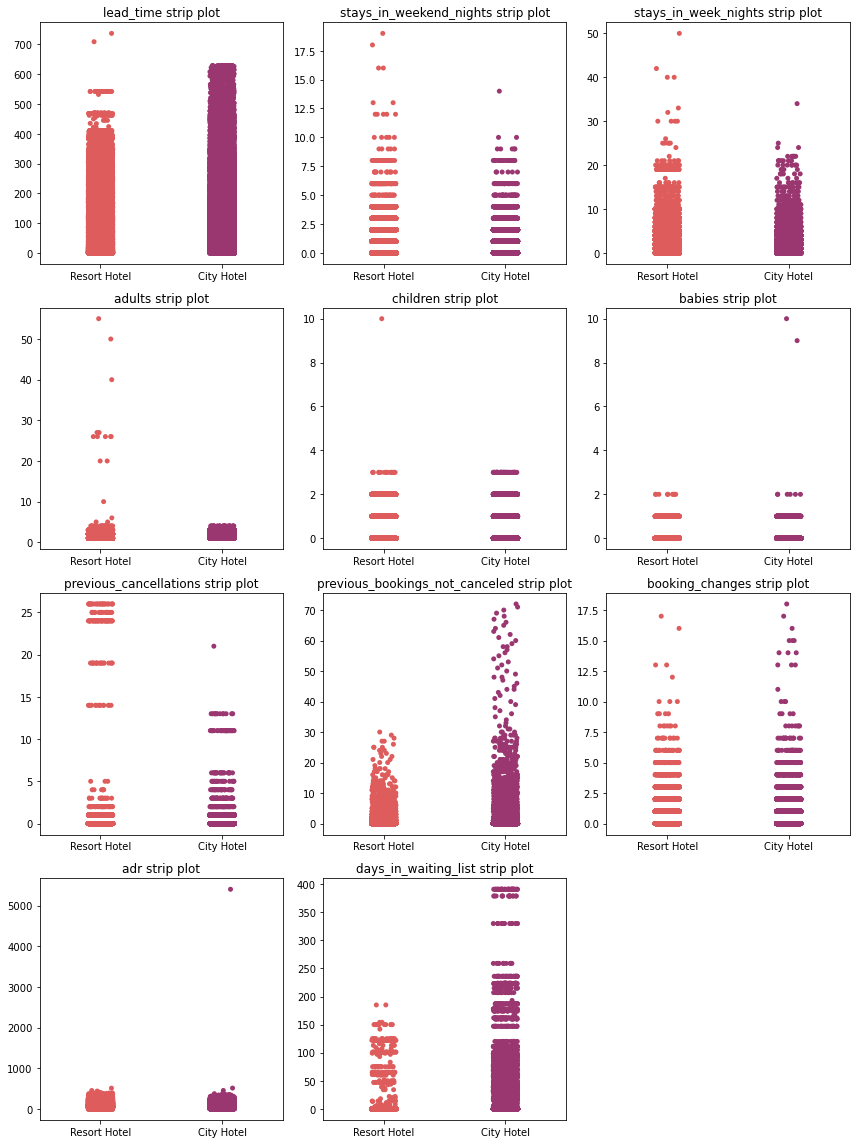

In [31]:
#strip plot distribution
attributes=['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies',
            'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'adr', 'days_in_waiting_list']

plt.figure(figsize = (12, 16))
i=1
for attri in attributes:
    plt.subplot(4,3,i)
    sns.stripplot(x='hotel', y=attri, data=df_new, palette='flare').set(xlabel=None, ylabel=None)
    plt.title(f'{attri} strip plot')
    plt.tight_layout()
    i=i+1

In [32]:
#cheking the shape of the dataframe with outliers
df_new.shape

(118986, 30)

In [33]:
#Dropping the extreme outliers. 
df_new = df_new[(df_new['lead_time']<680)]
df_new = df_new[(df_new['stays_in_weekend_nights']<11)]
df_new = df_new[(df_new['stays_in_week_nights']<27)]
df_new = df_new[(df_new['adults']<30)]
df_new = df_new[(df_new['children']<6)]
df_new = df_new[(df_new['babies']<6)]
df_new = df_new[(df_new['previous_cancellations']<8)]
df_new = df_new[(df_new['previous_bookings_not_canceled']<6)]
df_new = df_new[(df_new['booking_changes']<10)]
df_new = df_new[(df_new['adr']<5000)]
df_new = df_new[(df_new['days_in_waiting_list']<300)] 
#df_new = df_new[(df_new['required_car_parking_spaces']<6)]

#cheking the shape of the dataframe after removing the extreme outliers
df_new.shape

(117953, 30)

### Correlation

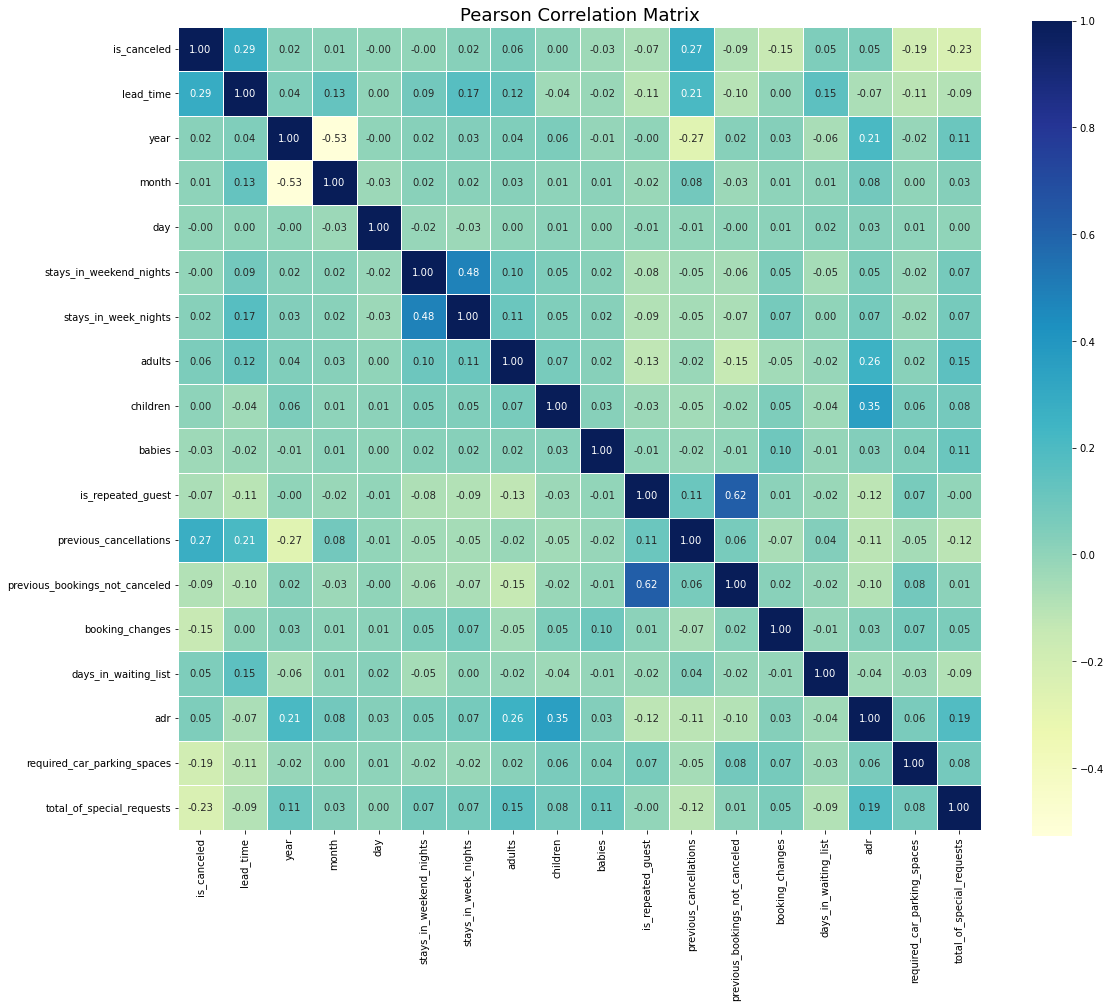

In [34]:
#correlation heatmap
plt.figure(figsize=(18,15))
corr=df_new.corr()
sns.heatmap(data=corr, square=True , annot=True, cmap='YlGnBu', fmt='.2f', cbar=True, linewidth=1)
plt.title('Pearson Correlation Matrix', fontdict={'fontsize':18});

In [35]:
#getting the correlations in descending order
cancel_corr=df_new.corr()['is_canceled']
cancel_corr.abs().sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.289062
previous_cancellations            0.273089
total_of_special_requests         0.234061
required_car_parking_spaces       0.194999
booking_changes                   0.149382
previous_bookings_not_canceled    0.086911
is_repeated_guest                 0.071139
adults                            0.055809
days_in_waiting_list              0.051087
adr                               0.046127
babies                            0.034537
stays_in_week_nights              0.024185
year                              0.020824
month                             0.008045
day                               0.004816
children                          0.004161
stays_in_weekend_nights           0.002917
Name: is_canceled, dtype: float64

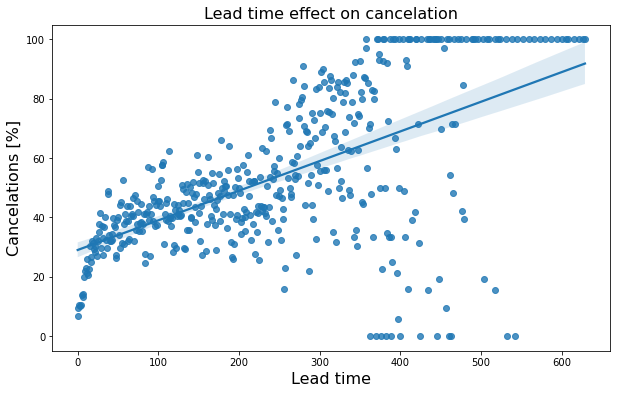

In [36]:
lead_cancel = df_new.groupby('lead_time')['is_canceled'].describe()

#plotting the graph
plt.figure(figsize=(10, 6))
sns.regplot(x=lead_cancel.index, y=lead_cancel['mean'].values * 100)
plt.title('Lead time effect on cancelation', fontsize=16)
plt.xlabel('Lead time', fontsize=16)
plt.ylabel('Cancelations [%]', fontsize=16)
plt.show()

# Data Preprocessing

### Categorical variables analysis

In [37]:
#getting the list of all categorical variables
c_var=df_new.select_dtypes(include=['object']).columns
c_var=c_var.drop('country')
print('Categorical variables:')
print(c_var)

Categorical variables:
Index(['hotel', 'meal', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type', 'reservation_status'],
      dtype='object')


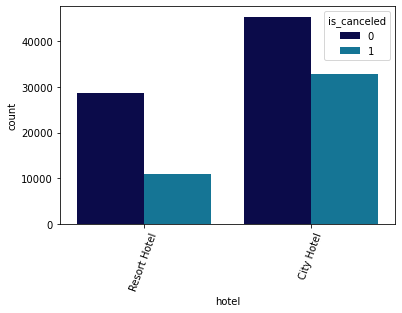

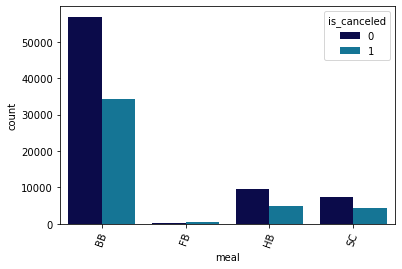

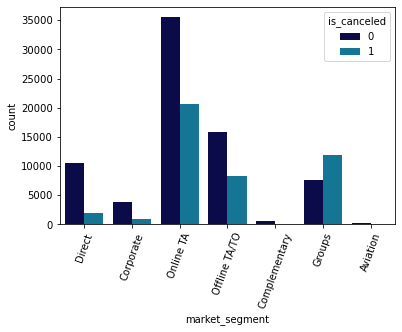

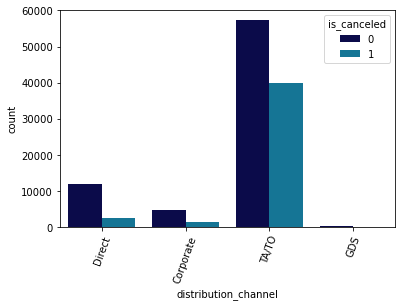

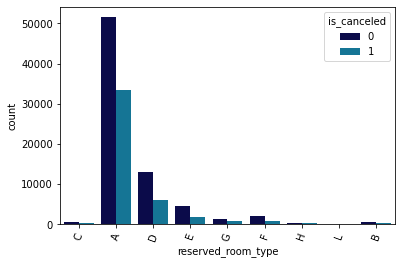

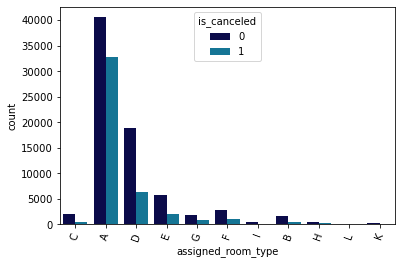

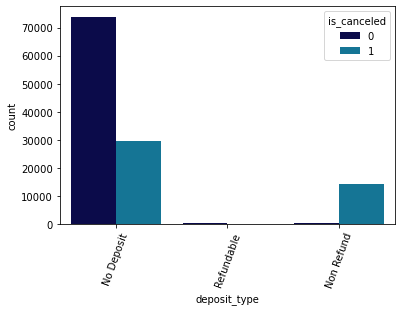

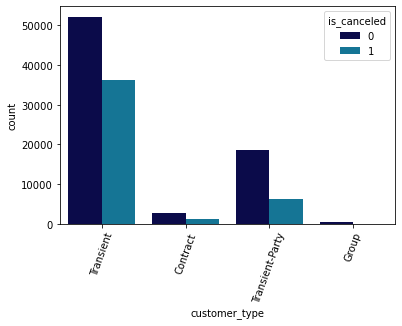

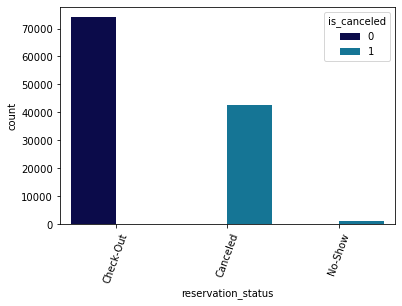

In [38]:
for c in c_var:
    
    ax = sns.countplot(x=c, hue='is_canceled', data=df_new, palette='ocean')
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 70)
    
    plt.show()

### Handling features

In [39]:
#adding a new column to get the total number of guests for better visualisations
df_new['total_guests'] = df_new['adults']+df_new['children']+df_new['babies']

In [40]:
#adding a new column to get the total number of nights spend  for better visualisations
df_new['total_nights'] = df_new['stays_in_weekend_nights']+df_new['stays_in_week_nights']

In [44]:
#exporting the cleaned data to a new csv file
df_new.to_csv('hotel_bookings_cleaned.csv',index=False)

In [41]:
#removing columns that are unnecessary for model prediction
unnecessary_col=['year','month','day','arrival_date','reservation_status','reservation_status_date',
                'total_guests','total_nights']

df_new.drop(unnecessary_col,axis=1,inplace=True)
df_new.columns

Index(['hotel', 'is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

In [42]:
#getting the numerical features and categorical features as seperate dataframes
nume_features=df_new.select_dtypes(include=['int64','float64']).drop(['is_canceled'], axis=1).columns
cate_features=df_new.select_dtypes(include=['object']).columns

print('numerical features:',nume_features)
print('categorical features:',cate_features)

numerical features: Index(['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'children', 'babies', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')
categorical features: Index(['hotel', 'meal', 'country', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type'],
      dtype='object')


### Label encoding and One hot encoding

In [43]:
#importing the required libraries
import scikitplot as skplt
import xgboost as xgb
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from collections import Counter

In [44]:
#making a copy of the dataframe 
df_encoded=df_new.copy()

#converting the categorical variables to numerical variables through one-hot encoding
df_encoded=pd.get_dummies(data=df_encoded, columns=['hotel','meal','market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type'])
#converting the 'country' feature using label encorder as it is a high cardinal column
le=LabelEncoder()
df_encoded['country']=le.fit_transform(df_encoded['country']) 

df_encoded

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,is_repeated_guest,previous_cancellations,...,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,0,0,2,0.0,0,135,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,7,0,1,1,0.0,0,59,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,13,0,1,1,0.0,0,59,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,14,0,2,2,0.0,0,59,0,0,...,0,0,0,1,0,0,0,0,1,0
5,0,14,0,2,2,0.0,0,59,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2,5,2,0.0,0,15,0,0,...,0,0,0,1,0,0,0,0,1,0
119386,0,102,2,5,3,0.0,0,56,0,0,...,0,0,0,1,0,0,0,0,1,0
119387,0,34,2,5,2,0.0,0,43,0,0,...,0,0,0,1,0,0,0,0,1,0
119388,0,109,2,5,2,0.0,0,59,0,0,...,0,0,0,1,0,0,0,0,1,0


In [45]:
df_encoded.columns

Index(['is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'country',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'hotel_City Hotel', 'hotel_Resort Hotel',
       'meal_BB', 'meal_FB', 'meal_HB', 'meal_SC', 'market_segment_Aviation',
       'market_segment_Complementary', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'distribution_channel_Corporate', 'distribution_channel_Direct',
       'distribution_channel_GDS', 'distribution_channel_TA/TO',
       'reserved_room_type_A', 'reserved_room_type_B', 'reserved_room_type_C',
       'reserved_room_type_D', 'reserved_room_type_E', 'reserved_room_type_F',
       'reserved_room_type_G', 'reserve

In [46]:
#getting the shape of the new dataframe
df_encoded.shape

(117953, 60)

### Feature Selection

In [47]:
#independent variables columns
Xx=df_encoded.drop('is_canceled', axis=1)
#target column
yy=df_encoded['is_canceled']

#selecting the best 30 features using chi-square scores
chi2_feat = SelectKBest(score_func=chi2, k=10)
chi2_fit = chi2_feat.fit(Xx, yy)


df_scores = pd.DataFrame(chi2_fit.scores_)
df_columns = pd.DataFrame(Xx.columns)

#combining the two dataframes for a clear view of the results
feat_Scores = pd.concat([df_columns,df_scores],axis=1)
feat_Scores.columns = ['Specs','Score']  
print(feat_Scores.nlargest(30,'Score'))  

                             Specs         Score
0                        lead_time  1.074021e+06
6                          country  1.883341e+05
11            days_in_waiting_list  3.272749e+04
53         deposit_type_Non Refund  2.391590e+04
8           previous_cancellations  9.074559e+03
14       total_of_special_requests  7.088583e+03
12                             adr  5.651175e+03
25           market_segment_Groups  4.713671e+03
10                 booking_changes  4.534731e+03
13     required_car_parking_spaces  4.321698e+03
52         deposit_type_No Deposit  3.319269e+03
24           market_segment_Direct  2.540332e+03
29     distribution_channel_Direct  2.389910e+03
9   previous_bookings_not_canceled  2.377569e+03
41            assigned_room_type_A  1.740815e+03
16              hotel_Resort Hotel  1.534161e+03
44            assigned_room_type_D  1.527325e+03
58   customer_type_Transient-Party  1.495371e+03
15                hotel_City Hotel  7.766111e+02
31      distribution

In [48]:
#removing columns that were not included in the best 30 features
df_encoded.drop(['stays_in_weekend_nights','stays_in_week_nights', 'adults', 'children', 'babies','meal_BB', 
                 'meal_FB', 'meal_HB', 'meal_SC','market_segment_Aviation', 'market_segment_Complementary',
                 'market_segment_Offline TA/TO','market_segment_Online TA','distribution_channel_GDS','reserved_room_type_A',
       'reserved_room_type_B', 'reserved_room_type_C','reserved_room_type_E', 'reserved_room_type_F', 'reserved_room_type_G',
       'reserved_room_type_H', 'reserved_room_type_L','assigned_room_type_D','assigned_room_type_G','assigned_room_type_H',
       'assigned_room_type_K', 'assigned_room_type_L','deposit_type_Refundable','customer_type_Contract', 'customer_type_Group'
                ], axis=1, inplace=True) 
df_encoded.shape

(117953, 30)

### Balancing the data

In [49]:
#checking if the target variable is balanced
df_encoded['is_canceled'].value_counts()

0    74098
1    43855
Name: is_canceled, dtype: int64

In [50]:
#getting the percentage of it
(df_encoded['is_canceled'].value_counts()/df_encoded['is_canceled'].value_counts().sum())*100

0    62.819937
1    37.180063
Name: is_canceled, dtype: float64

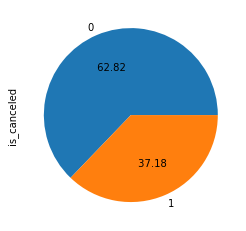

In [51]:
#pie chart of the value counts of the target variable
df_encoded['is_canceled'].value_counts().plot.pie(autopct = "% .2f");

In [52]:
#getting the columns excluding the dependent variable
X=df_encoded.drop('is_canceled', axis=1)

#getting only the dependent variable
y=df_encoded['is_canceled']

X.shape, y.shape

((117953, 29), (117953,))

In [53]:
#applying normalisation for numerical stability
standardizer=StandardScaler()
X=standardizer.fit_transform(X)

In [54]:
#splitting the dataset where the testing data will be of 20%
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=6)
print("Before undersampling: ", Counter(y_train))

#undersampling strategy
random_under_sample=RandomUnderSampler(sampling_strategy='majority',random_state=6)

#fitting and applying the transform
X_train_under, y_train_under=random_under_sample.fit_resample(X_train, y_train)
print("After undersampling: ", Counter(y_train_under))

Before undersampling:  Counter({0: 59337, 1: 35025})
After undersampling:  Counter({0: 35025, 1: 35025})


In [55]:
print('X_train:',len(X_train_under))
print('X_test:',len(X_test))
print('y_train:',len(y_train_under))
print('y_test:',len(y_test))

X_train: 70050
X_test: 23591
y_train: 70050
y_test: 23591


# Application of Machine Learning Algorithms

### Logistic Regression

In [56]:
#fitting the model
lr=LogisticRegression()
lr.fit(X_train_under, y_train_under)

#predicting the values
y_prediction_lr=lr.predict(X_test)

#getting the accuracy score
acc_lr=accuracy_score(y_test, y_prediction_lr)
print('Accuracy score of the model = ',acc_lr)

Accuracy score of the model =  0.7768640583273282


Confusion Matrix:
 [[12021  2740]
 [ 2524  6306]]


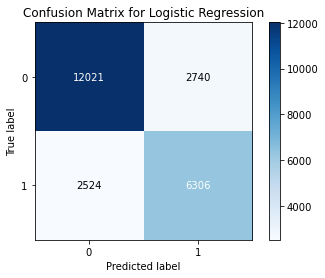

In [57]:
#confusion matrix
conf_ma_lr=confusion_matrix(y_test, y_prediction_lr)
print('Confusion Matrix:\n',conf_ma_lr)

skplt.metrics.plot_confusion_matrix(y_test, y_prediction_lr, title='Confusion Matrix for Logistic Regression');

In [58]:
#Classification Report
classifi_report_lr=classification_report(y_test, y_prediction_lr)
print('Classification Report:\n',classifi_report_lr)

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82     14761
           1       0.70      0.71      0.71      8830

    accuracy                           0.78     23591
   macro avg       0.76      0.76      0.76     23591
weighted avg       0.78      0.78      0.78     23591



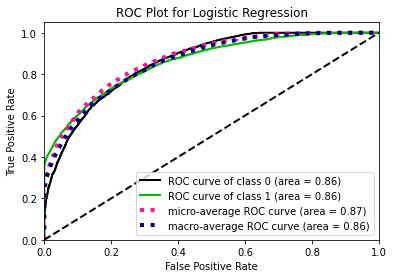

In [59]:
#plotting the ROC curve
y_prob_lr=lr.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_prob_lr, title='ROC Plot for Logistic Regression');

### Decision Tree Classifier

In [60]:
#fitting the model
dt=DecisionTreeClassifier()
dt.fit(X_train_under, y_train_under)

#predicting the values
y_prediction_dt=dt.predict(X_test)

#getting the accuracy score
acc_dt=accuracy_score(y_test, y_prediction_dt)
print('Accuracy score of the model = ',acc_dt)

Accuracy score of the model =  0.8086982323767539


Confusion Matrix:
 [[11865  2896]
 [ 1617  7213]]


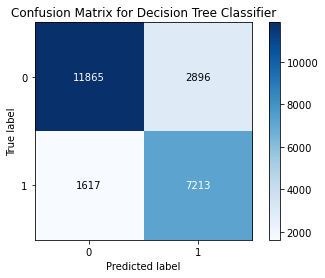

In [61]:
#confusion matrix
conf_ma_dt=confusion_matrix(y_test, y_prediction_dt)
print('Confusion Matrix:\n',conf_ma_dt)

skplt.metrics.plot_confusion_matrix(y_test, y_prediction_dt, title='Confusion Matrix for Decision Tree Classifier');

In [62]:
#Classification Report
classifi_report_dt=classification_report(y_test, y_prediction_dt)
print('Classification Report:\n',classifi_report_dt)

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.80      0.84     14761
           1       0.71      0.82      0.76      8830

    accuracy                           0.81     23591
   macro avg       0.80      0.81      0.80     23591
weighted avg       0.82      0.81      0.81     23591



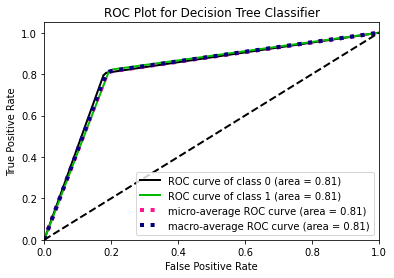

In [63]:
#plotting the ROC curve
y_prob_dt=dt.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_prob_dt, title='ROC Plot for Decision Tree Classifier');

### Random Forest Classifier

In [64]:
#fitting the model
RF=RandomForestClassifier()
RF.fit(X_train_under, y_train_under)

#predicting the values
y_prediction_RF=RF.predict(X_test)

#getting the accuracy score
acc_RF=accuracy_score(y_test, y_prediction_RF)
print('Accuracy score of the model = ',acc_RF)

Accuracy score of the model =  0.8547751261074138


Confusion Matrix:
 [[12754  2007]
 [ 1419  7411]]


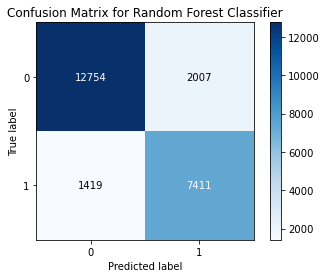

In [65]:
#confusion matrix
conf_ma_RF=confusion_matrix(y_test, y_prediction_RF)
print('Confusion Matrix:\n',conf_ma_RF)

skplt.metrics.plot_confusion_matrix(y_test, y_prediction_RF, title='Confusion Matrix for Random Forest Classifier');

In [66]:
#Classification Report
classifi_report_RF=classification_report(y_test, y_prediction_RF)
print('Classification Report:\n',classifi_report_RF)

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88     14761
           1       0.79      0.84      0.81      8830

    accuracy                           0.85     23591
   macro avg       0.84      0.85      0.85     23591
weighted avg       0.86      0.85      0.86     23591



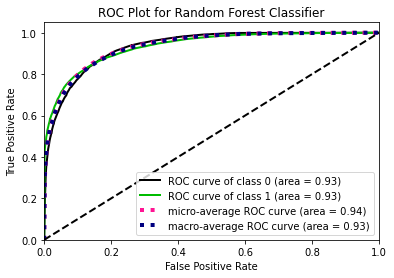

In [67]:
#plotting the ROC curve
y_prob_RF=RF.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_prob_RF, title='ROC Plot for Random Forest Classifier');

### K-Nearest Neighbors 

In [68]:
#fitting the model
knn=KNeighborsClassifier()
knn.fit(X_train_under, y_train_under)

#predicting the values
y_prediction_knn=knn.predict(X_test)

#getting the accuracy score
acc_knn=accuracy_score(y_test, y_prediction_knn)
print('Accuracy score of the model = ',acc_knn)

Accuracy score of the model =  0.8163706498240855


Confusion Matrix:
 [[12102  2659]
 [ 1673  7157]]


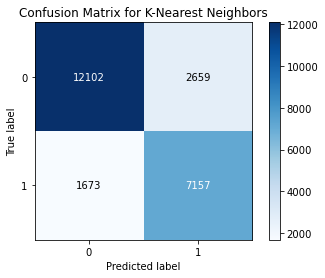

In [69]:
#confusion matrix
conf_ma_knn=confusion_matrix(y_test, y_prediction_knn)
print('Confusion Matrix:\n',conf_ma_knn)

skplt.metrics.plot_confusion_matrix(y_test, y_prediction_knn, title='Confusion Matrix for K-Nearest Neighbors');

In [70]:
#Classification Report
classifi_report_knn=classification_report(y_test, y_prediction_knn)
print('Classification Report:\n',classifi_report_knn)

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85     14761
           1       0.73      0.81      0.77      8830

    accuracy                           0.82     23591
   macro avg       0.80      0.82      0.81     23591
weighted avg       0.82      0.82      0.82     23591



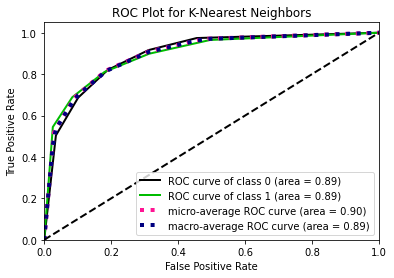

In [71]:
#plotting the ROC curve
y_prob_knn=knn.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_prob_knn, title='ROC Plot for K-Nearest Neighbors');

### Bernoulli Naive Bayes

In [72]:
#fitting the model
BNV=BernoulliNB()
BNV.fit(X_train_under, y_train_under)

#predicting the values
y_prediction_BNV=BNV.predict(X_test)

#getting the accuracy score
acc_BNV=accuracy_score(y_test, y_prediction_BNV)
print('Accuracy score of the model = ',acc_BNV)

Accuracy score of the model =  0.753677249798652


Confusion Matrix:
 [[12549  2212]
 [ 3599  5231]]


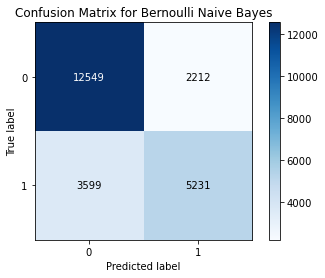

In [73]:
#confusion matrix
conf_ma_BNV=confusion_matrix(y_test, y_prediction_BNV)
print('Confusion Matrix:\n',conf_ma_BNV)

skplt.metrics.plot_confusion_matrix(y_test, y_prediction_BNV, title='Confusion Matrix for Bernoulli Naive Bayes');

In [74]:
#Classification Report
classifi_report_BNV=classification_report(y_test, y_prediction_BNV)
print('Classification Report:\n',classifi_report_BNV)

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.85      0.81     14761
           1       0.70      0.59      0.64      8830

    accuracy                           0.75     23591
   macro avg       0.74      0.72      0.73     23591
weighted avg       0.75      0.75      0.75     23591



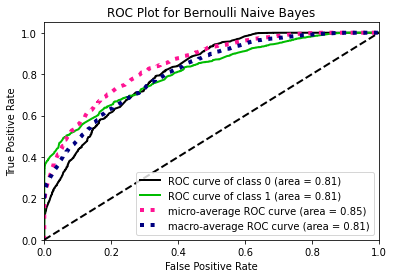

In [75]:
#plotting the ROC curve
y_prob_BNV=BNV.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_prob_BNV, title='ROC Plot for Bernoulli Naive Bayes');

## Model Comparison

In [76]:
scores=[['Logistic Regression',acc_lr],['Decision Tree Classifier',acc_dt],['Random Forest Classifier',acc_RF],
        ['K-Nearest Neighbors',acc_knn],['Bernoulli Naive Bayes',acc_BNV]]

scores_df=pd.DataFrame(scores,columns=['Model','Accuracy Score'])

scores_df.sort_values(by='Accuracy Score', ascending=False)

,Model,Accuracy Score
2,Random Forest Classifier,0.854775
3,K-Nearest Neighbors,0.816371
1,Decision Tree Classifier,0.808698
0,Logistic Regression,0.776864
4,Bernoulli Naive Bayes,0.753677


### Cross Validation

In [78]:
LR= LogisticRegression()
DT= DecisionTreeClassifier()
RF= RandomForestClassifier()
KNN= KNeighborsClassifier()
BNV= BernoulliNB()

models=[LR,DT,RF,KNN,BNV]
y=df_encoded['is_canceled']
Cscores=[]

for m in models:
    
    Cscore=cross_val_score(m,X,y,cv=5).mean()
    Cscores.append(Cscore)
    
Cscores

[0.7485954780213152,
 0.6909108342360246,
 0.7346234534624061,
 0.7307322424799378,
 0.7343436595195332]

### Feature Importances

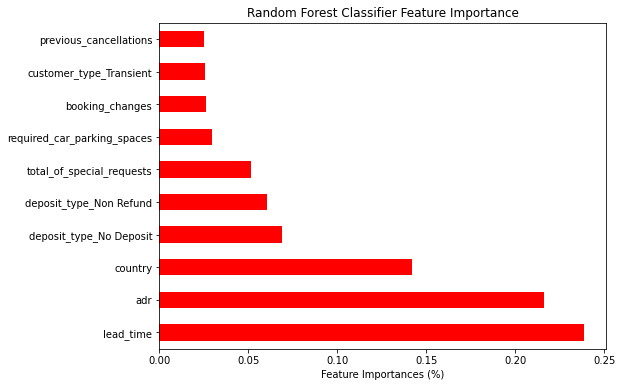

In [79]:
#fitting the model
RF=RandomForestClassifier()
RF.fit(X_train_under, y_train_under)

#predicting the values
y_prediction_RF=RF.predict(X_test)

#plot the graph of feature importances 
feat_importances_RF = pd.Series(RF.feature_importances_, index=df_encoded.drop('is_canceled', axis=1).columns)
feat_importances_RF.nlargest(10).plot(kind='barh',figsize=(8,6),color='red')
plt.title("Random Forest Classifier Feature Importance")
plt.xlabel("Feature Importances (%)")
plt.show()